# Importing Libraries to do the job

In [1]:
# importing common libraries

In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import xgboost as xgb

In [6]:
# importing model related libraries

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
dataset = pd.read_csv('train.csv')

# Data Analysis

In [11]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
dataset.shape

# We have 1460 rows and 81 columns

(1460, 81)

In [19]:
dataset.size

118260

In [20]:
1460 * 81

118260

In [28]:
dataset.dtypes['RoofMatl']

dtype('O')

# Data Analysis - Pre Processing

In [29]:
# getting qualitative columns from the dataset
qual_columns = [f for f in dataset.columns if dataset.dtypes[f] == 'object' ]

In [37]:
# getting quantitative columns from the dataset
quan_columns = [f for f in dataset.columns if dataset.dtypes[f] != 'object']

In [33]:
len(qual_columns)  + len(quan_columns)

81

In [35]:
len(dataset.columns)

81

In [36]:
len(dataset.columns) == len(qual_columns) + len(quan_columns)

True

In [38]:
# preview Qualitative columns
for i in qual_columns:
    print(i, sep= '/n')

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [41]:
# Preview Quantitative Columns
for i in quan_columns:
    print(i, sep='/n')

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [43]:
dataset['Id'], dataset['SalePrice']

(0          1
 1          2
 2          3
 3          4
 4          5
 5          6
 6          7
 7          8
 8          9
 9         10
 10        11
 11        12
 12        13
 13        14
 14        15
 15        16
 16        17
 17        18
 18        19
 19        20
 20        21
 21        22
 22        23
 23        24
 24        25
 25        26
 26        27
 27        28
 28        29
 29        30
         ... 
 1430    1431
 1431    1432
 1432    1433
 1433    1434
 1434    1435
 1435    1436
 1436    1437
 1437    1438
 1438    1439
 1439    1440
 1440    1441
 1441    1442
 1442    1443
 1443    1444
 1444    1445
 1445    1446
 1446    1447
 1447    1448
 1448    1449
 1449    1450
 1450    1451
 1451    1452
 1452    1453
 1453    1454
 1454    1455
 1455    1456
 1456    1457
 1457    1458
 1458    1459
 1459    1460
 Name: Id, Length: 1460, dtype: int64, 0       208500
 1       181500
 2       223500
 3       140000
 4       250000
 5       143000
 6       307

In [48]:
# Here we could remove 'Id', 'SalePrice' from quanitative columns
quan_columns.remove('SalePrice')

In [52]:
len(quan_columns) + len(qual_columns)

79

In [53]:
dataset_test = pd.read_csv('test.csv')
dataset.shape

(1460, 81)

In [54]:
len(quan_columns
   )

36

In [55]:
len(qual_columns
   )

43

# Data Analysis - Missing Data - Graphs

In [82]:
missing_sum = dataset.isnull().sum().sort_values(ascending=False)
missing_perc = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending = False)
# missing is of type Series
print('Missing Values Report:')
missing_report = pd.concat([missing_sum, missing_perc],axis = 1, keys=['Total','Percentage'])
missing_report

Missing Values Report:


,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [ ]:
# Getting the missing values in a different way and building the graph

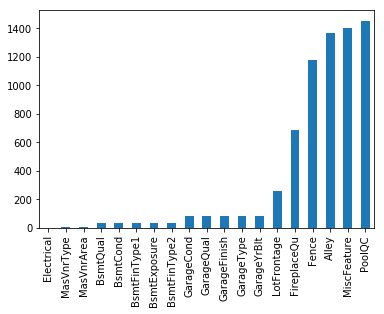

In [95]:
missing = dataset.isnull().sum()
# getting only the missing attributes
missing = missing[missing > 0]
type(missing)
missing.sort_values(inplace=True)
missing.plot.bar()

In [101]:
# total number of attributes having missing values
len(missing)

19

# Data Preprocessing - Missing Data - Removal

In [109]:
# removing the columns with the highest number of missing data
# getting column names
missing_report[missing_report['Total'] > 1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [113]:
missing_sum[missing_sum > 1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [117]:
# dropping the columns that are having many null values
dataset = dataset.drop(missing_report[missing_report['Total'] > 1].index, 1)

In [125]:
# removing that one null value line from 'Electrical' attribute
dataset = dataset.drop(dataset.loc[dataset['Electrical'].isnull()].index)

In [127]:
dataset.shape

(1459, 63)

In [130]:
# checking the null values
dataset.isnull().sum().max()

0

# Analysing the SalePrice (Target y)

In [131]:
import scipy.stats as st

In [133]:
dataset.shape

(1459, 63)

In [143]:
y = dataset['SalePrice']
type(y)
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

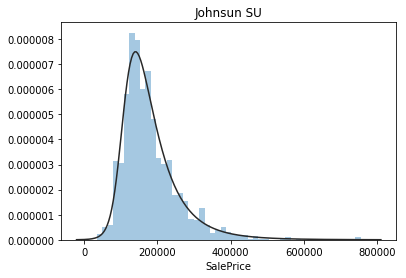

In [144]:
# Applying Johnsonsu on the SalePrice
plt.figure(1); plt.title('Johnsun SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

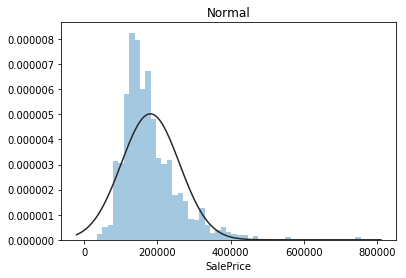

In [145]:
# Applying Normal on the SalePrice
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

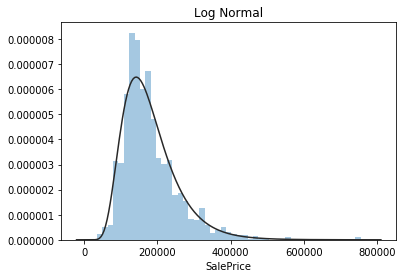

In [146]:
# Applying log normal on the SalePrice
plt.figure(1); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

# Results of different fits - 
# Johnson SU gets better results

In [147]:
# Either the dependent quantitative variables or the y variables follows Normal Distribution

In [166]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(dataset[quan_columns])
normal = normal.apply(test_normality)
print(not normal.any())

False


In [164]:
normal

MSSubClass       True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool

In [168]:
# Qualitative variables also don't have a normal distribution

Normal Distribution of Data
A normal distribution is a common probability distribution . It has a shape often referred to as a "bell curve."

Many everyday data sets typically follow a normal distribution: for example, the heights of adult humans, the scores on a test given to a large class, errors in measurements.

The normal distribution is always symmetrical about the mean.

The standard deviation is the measure of how spread out a normally distributed set of data is.  It is a statistic that tells you how closely all of the examples are gathered around the mean in a data set.  The shape of a normal distribution is determined by the mean and the standard deviation. The steeper the bell curve, the smaller the standard deviation.  If the examples are spread far apart, the bell curve will be much flatter, meaning the standard deviation is large. 

    

In general, about 68% of the area under a normal distribution curve lies within one standard deviation of the mean.

That is, if x⎯⎯ is the mean and σ is the standard deviation of the distribution, then 68% of the values fall in the range between (x⎯⎯−σ) and (x⎯⎯+σ) . In the figure below, this corresponds to the region shaded pink.



About 95% of the values lie within two standard deviations of the mean, that is, between (x⎯⎯−2σ) and (x⎯⎯+2σ) .

(In the figure, this is the sum of the pink and blue regions: 34%+34%+13.5%+13.5%=95% .)

About 99.7% of the values lie within three standard deviations of the mean, that is, between (x⎯⎯−3σ) and (x⎯⎯+3σ) .
(The pink, blue, and green regions in the figure.)

(Note that these values are approximate.)

# Getting the graphs for Normal Distribution of Quantitative Vars

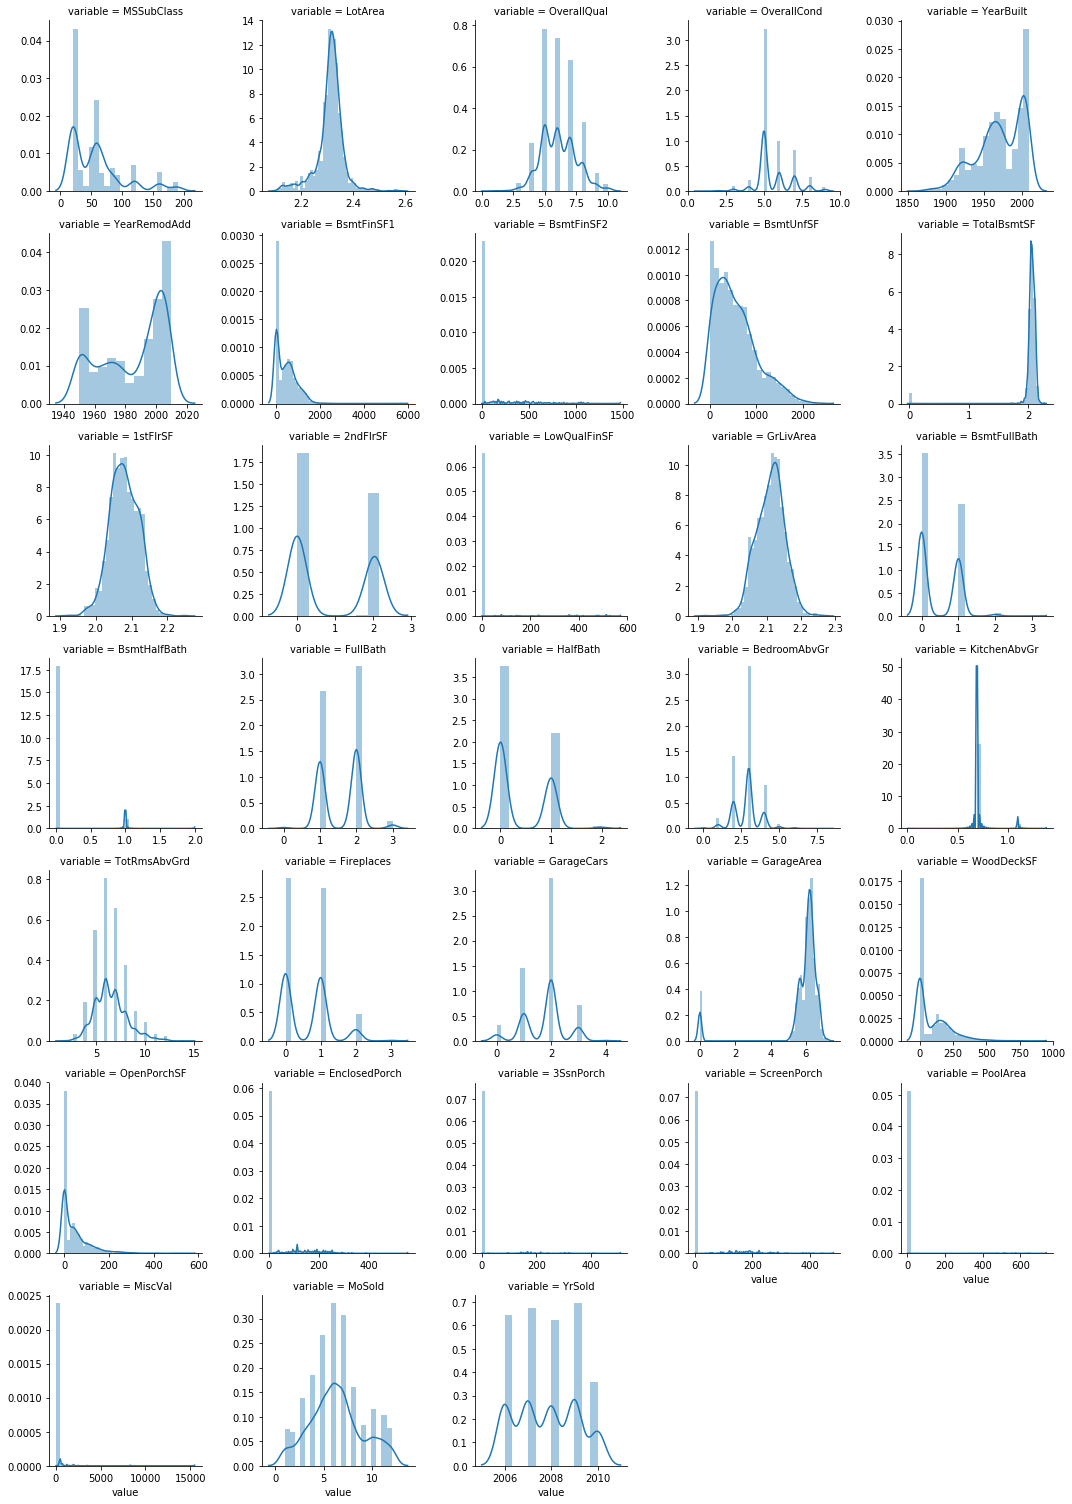

In [296]:
f = pd.melt(dataset, value_vars=quan_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

#to save a image
g.savefig('quan.png')

In [200]:
'LotFrontage' in quan_columns

False

In [176]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [211]:
# Getting all the Unique values for the attributes(Qualitative columns)
for i in dataset[qual_columns]:
    print(i, dataset[i].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [213]:
for i in qual_columns:
    print(dataset[i].astype('category'))

0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL
26      RL
27      RL
28      RL
29      RM
        ..
1430    RL
1431    RL
1432    RL
1433    RL
1434    RL
1435    RL
1436    RL
1437    RL
1438    RM
1439    RL
1440    RL
1441    RM
1442    FV
1443    RL
1444    RL
1445    RL
1446    RL
1447    RL
1448    RL
1449    RM
1450    RL
1451    RL
1452    RM
1453    RL
1454    FV
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1459, dtype: category
Categories (5, object): [C (all), FV, RH, RL, RM]
0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
5       Pave
6       Pave
7       Pave
8       Pave
9       Pave
10      Pave
11      Pave
12      Pave
13      Pave
14      Pave
15      Pave
16      Pave
17      Pave

In [214]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

# Graphs - Categorical Attributes vs SalePrice

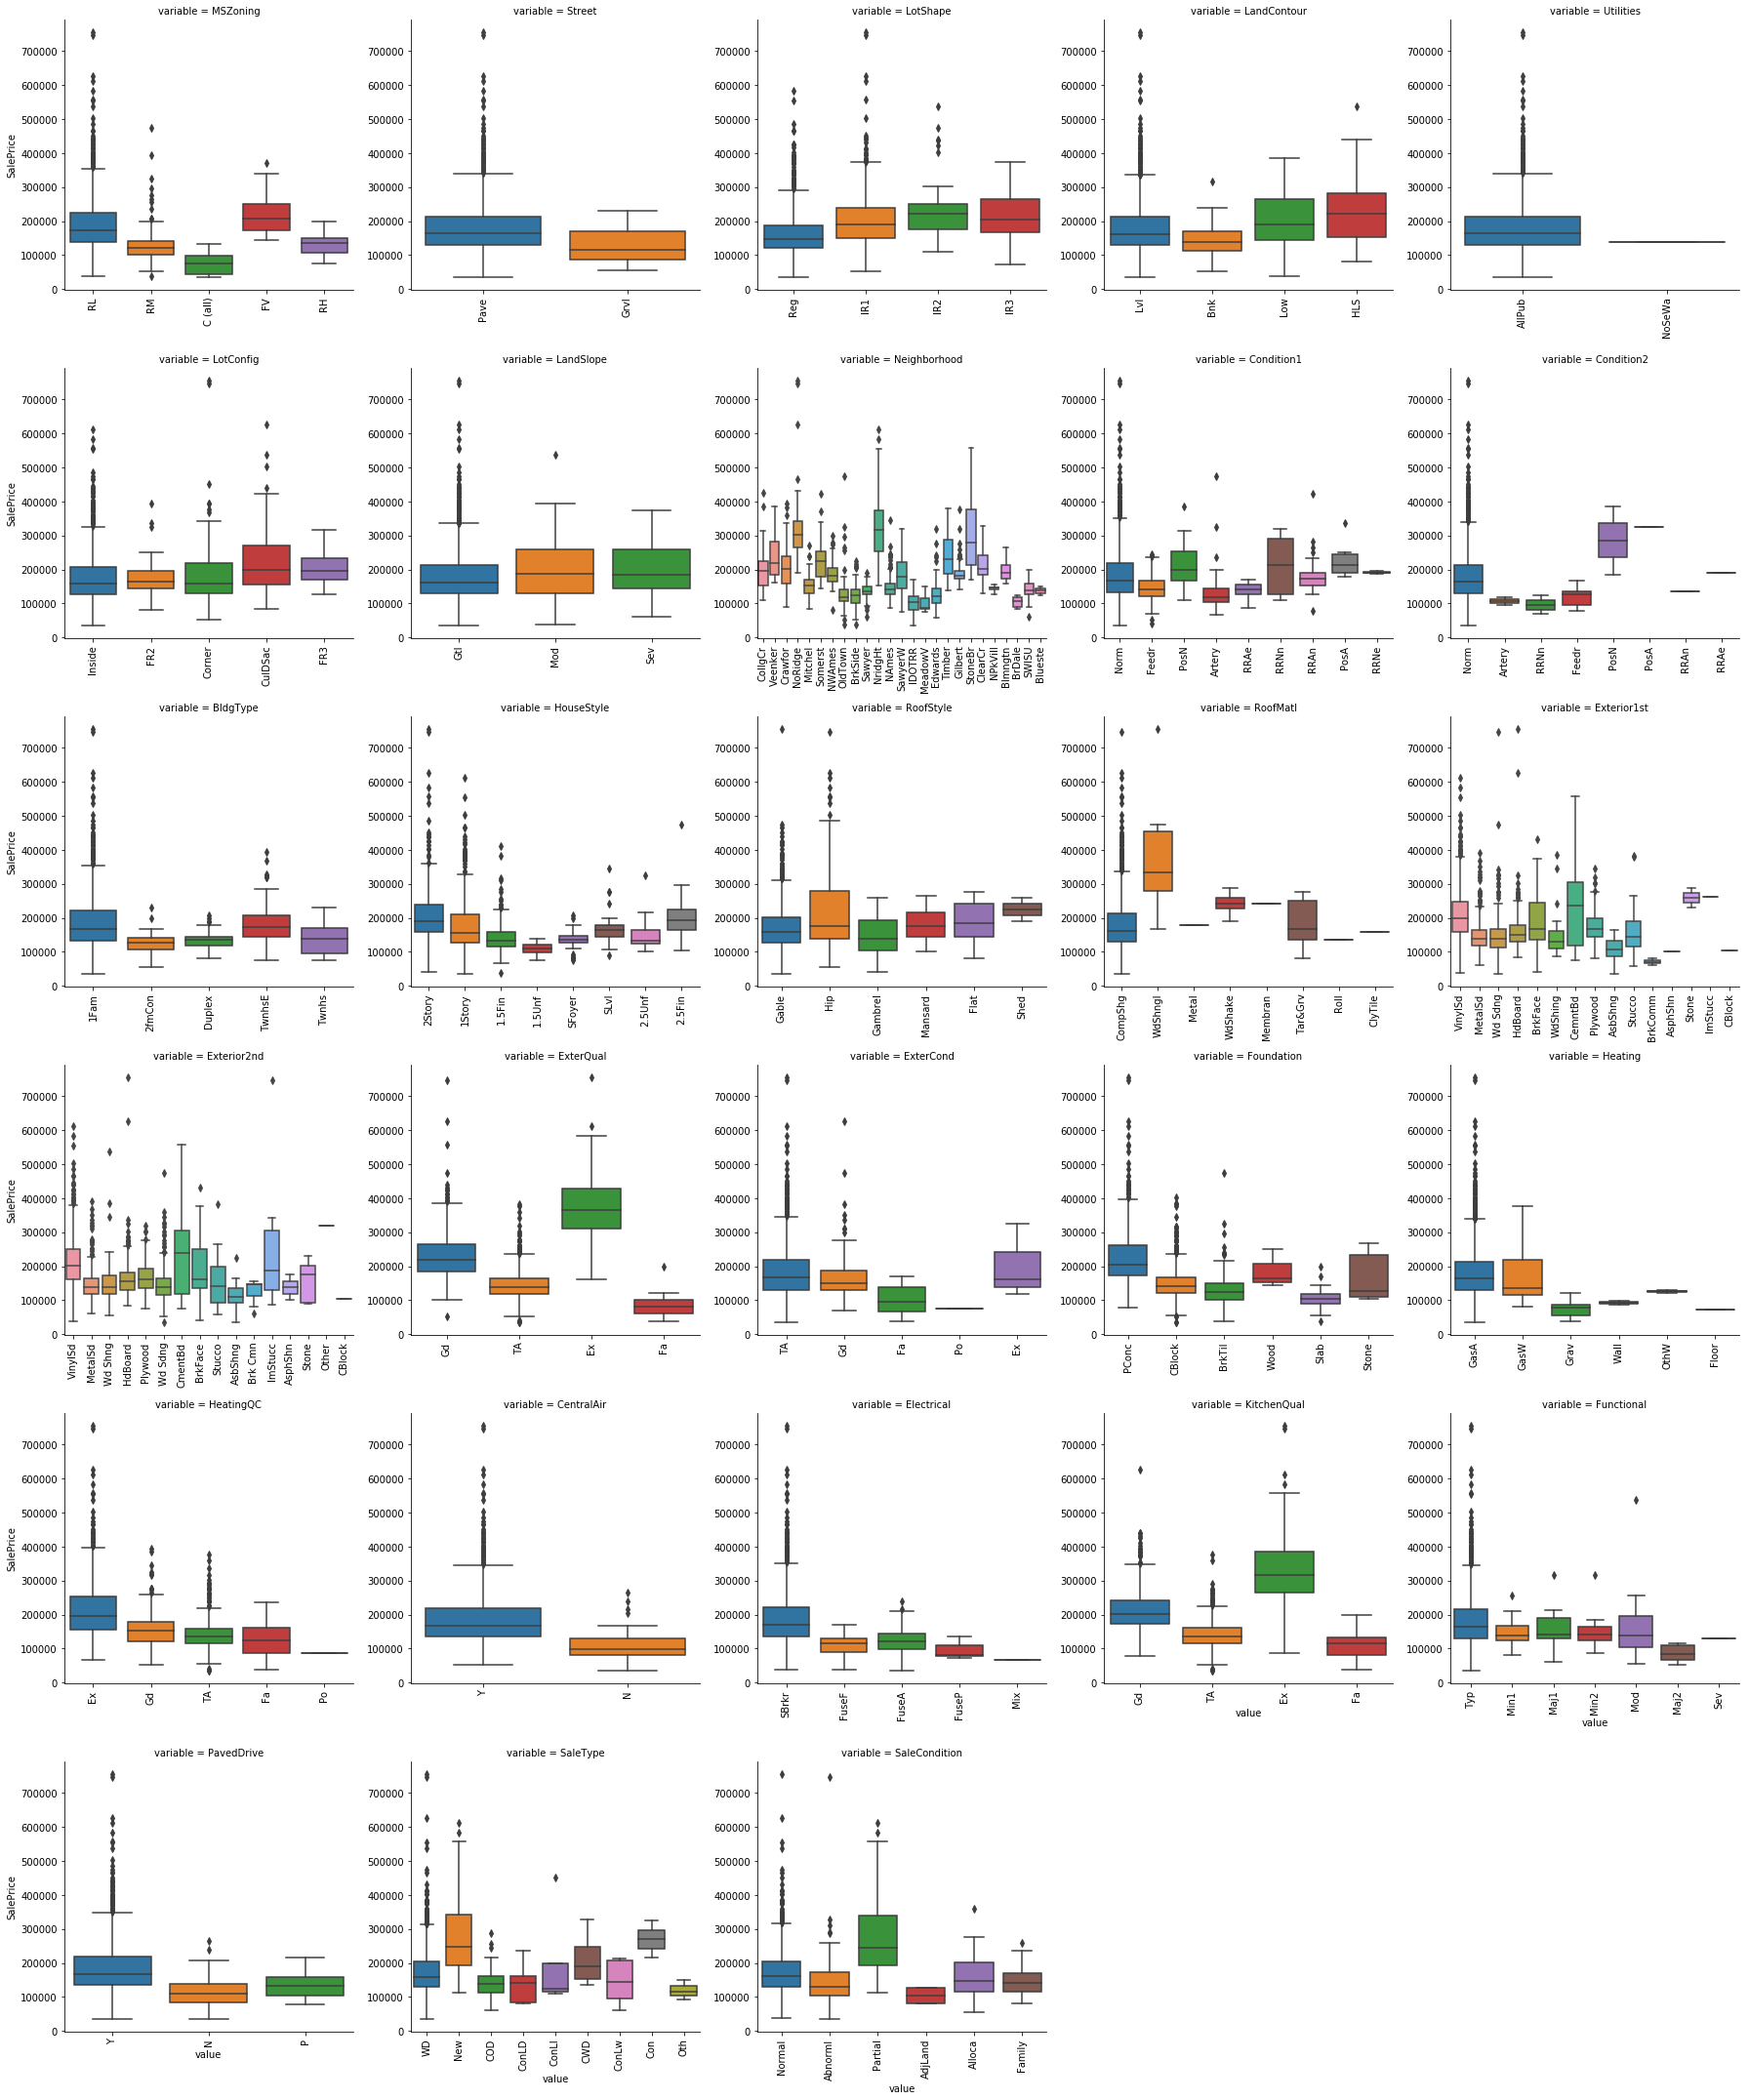

In [299]:
f = pd.melt(dataset, id_vars=['SalePrice'], value_vars=qual_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

#save as fig
g.savefig('Qualitative_Data_Box_Plots.png')

In [220]:
len(dataset.columns)
qual_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# ANOVA - Analysis of Variance - Anova Test

In [223]:
# Anova test to determine which independent variables have effect on the SalePrice

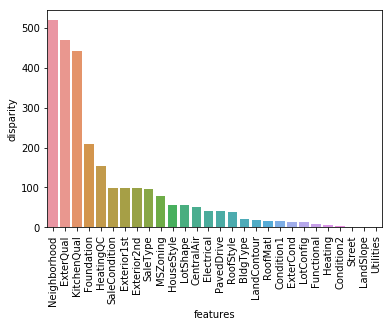

In [302]:
def Anova(frame):
    anv = pd.DataFrame()
    # qual_columns are the qualitative data
    anv['features'] = qual_columns
    pvals = []
    for feature in qual_columns:
        samples = []
        for unique_value_per_variable in frame[feature].unique():
            # adding to samples the each row per the unique values per the variable
            s = frame[frame[feature] == unique_value_per_variable]['SalePrice'].values
            samples.append(s)
        # The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

#building graph
a = Anova(dataset)
a['disparity'] = np.log(1./a['pval'].values)
qual_graph = sns.barplot(data=a, x='features', y='disparity')
x=plt.xticks(rotation=90)
plt.savefig('pval_qualitative_columns.png')

In [247]:
# Getting the details of Anova test
a

,features,pval,disparity
7,Neighborhood,8.807309e-226,518.208649
16,ExterQual,1.861836e-204,469.105796
23,KitchenQual,3.121752e-192,440.957943
18,Foundation,4.785251e-91,207.969705
20,HeatingQC,2.980579e-67,153.181084
27,SaleCondition,8.657635e-44,99.155302
14,Exterior1st,2.347229e-43,98.157924
15,Exterior2nd,4.373194e-43,97.535665
26,SaleType,5.473290e-42,95.008694
0,MSZoning,9.013044e-35,78.391805


In [244]:
dataset[dataset['MSZoning'] == 'RL']['SalePrice'].values.shape

(1150,)

In [239]:
dataset['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [252]:
dataset[dataset['MSZoning']=='RM'][['MSZoning','SalePrice']]

,MSZoning,SalePrice
8,RM,129900
15,RM,132000
21,RM,139400
23,RM,129900
29,RM,68500
48,RM,113000
51,RM,114500
52,RM,110000
61,RM,101000
63,RM,140000


# Important - ANOVA - 
If Variable has minor impact then set means should be equal
Decreasing pval is a sign of increasing diversity in partitions
That is the reason in the backward elimination, the variable with highest pval is removed.

In [261]:
def encode(dataframe, feature):
    ordering = pd.DataFrame()
    ordering['val'] = dataset[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = dataframe[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        dataframe.loc[dataframe[feature] == cat, feature+'_E'] = o

qual_encoded = []
for q in qual_columns:
    encode(dataset, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'PavedDrive_E', 'SaleType_E', 'SaleCondition_E']


In [255]:
dataset['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [260]:
dataset[['MSZoning', 'SalePrice']].groupby('MSZoning').mean()['SalePrice']

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191025.433913
RM         126316.830275
Name: SalePrice, dtype: float64

# Correlations

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


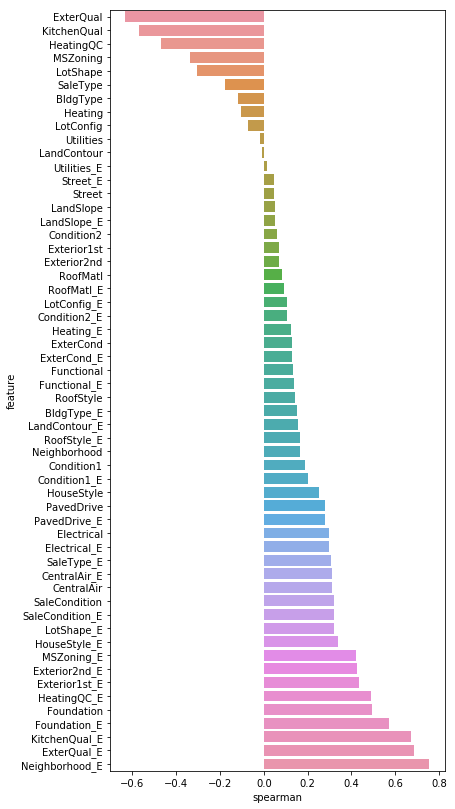

In [262]:
def spearman(dataframe, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [dataset[f].corr(dataset['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = qual_columns + qual_encoded
spearman(dataset, features)

# Heat Maps

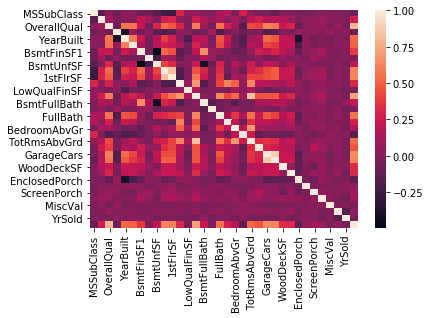

In [266]:
plt.figure(1)
corr = dataset[quan_columns + ['SalePrice']].corr()
sns.heatmap(corr)

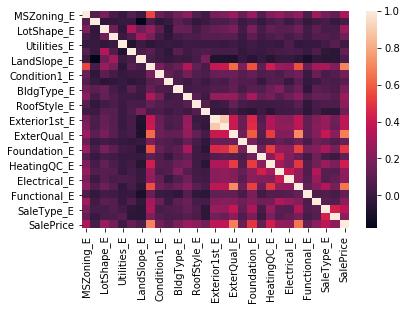

In [267]:
plt.figure(2)
corr = dataset[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

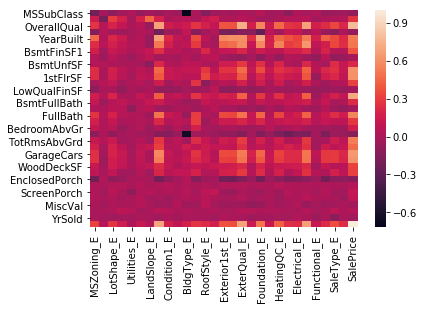

In [268]:
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quan_columns)+1, len(qual_encoded)+1]), index=quan_columns+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quan_columns+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = dataset[q1].corr(dataset[q2])
sns.heatmap(corr)

# PairPlot - Independent vs Dependent variable

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


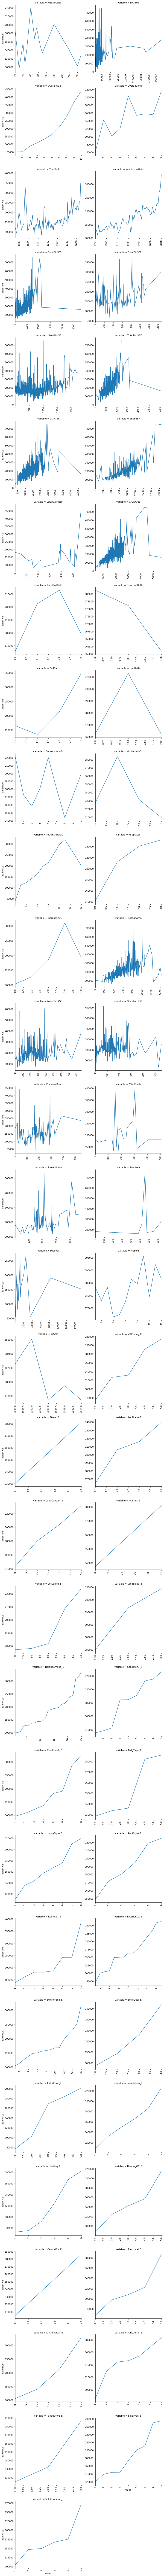

In [269]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(dataset, id_vars=['SalePrice'], value_vars=quan_columns+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

# Price Segments

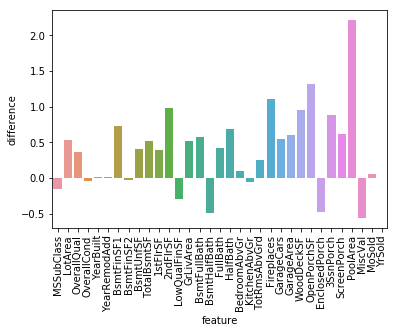

In [271]:
# Correlations changes with the change in the prices

features = quan_columns

standard = dataset[dataset['SalePrice'] < 200000]
pricey = dataset[dataset['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

# Clustering

0.806504359067156


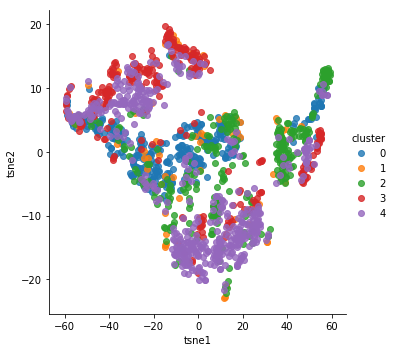

In [272]:
features = quan_columns + qual_encoded
# t-distributed stochastic neighbor embedding
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = dataset[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

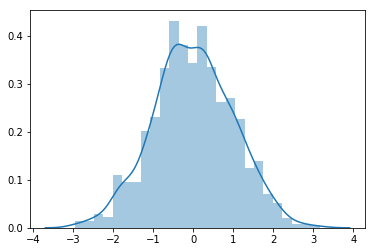

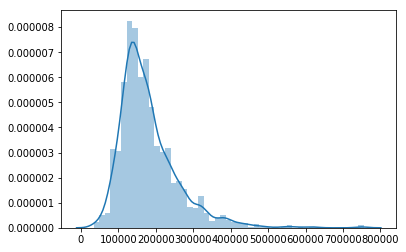

In [274]:
y = dataset['SalePrice'].values
def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)

# Regression Implementation

In [278]:
# error function
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

# log transform
def log_transform(feature):
    dataset[feature] = np.log1p(dataset[feature].values)

# quadratic 
def quadratic(feature):
    dataset[feature+'2'] = dataset[feature]**2

In [284]:
# log transform
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
#log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

In [285]:
# quadratic
quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

In [292]:
qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

dataset['HasBasement'] = dataset['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasGarage'] = dataset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
dataset['Has2ndFloor'] = dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
#dataset['HasMasVnr'] = dataset['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasWoodDeck'] = dataset['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasPorch'] = dataset['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasPool'] = dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
dataset['IsNew'] = dataset['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = quan_columns + qual_encoded + boolean + qdr
import sklearn.linear_model as linear_model
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = dataset[features].fillna(0.).values
Y = dataset['SalePrice'].values
lasso.fit(X, np.log(Y))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoLarsCV(copy_X=True, cv='warn', eps=2.220446049250313e-16,
      fit_intercept=True, max_iter=10000, max_n_alphas=1000, n_jobs=None,
      normalize=True, positive=False, precompute='auto', verbose=False)

In [293]:
# predicting error
Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

0.11646514795645449